In [133]:
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import layers
from keras.backend import clear_session

In [134]:
def import_train_test_data():
    import data_process_module
    x_train, x_test, y_train, y_test = data_process_module.clean_split()
    return (x_train, x_test, y_train, y_test)

In [135]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(ngram_range=(1,2))

In [136]:
def vectorize_data():
    x_train, x_test, y_train, y_test = import_train_test_data()
    loaded_vectorizer = pickle.load(open('vectorizer.pickle', 'rb'))
    x_train_cvec = loaded_vectorizer.transform(x_train).toarray()
    x_test_cvec = loaded_vectorizer.transform(x_test).toarray()

    return (x_train_cvec, x_test_cvec)

In [142]:
def build_train_model():
    x_train, x_test, y_train, y_test = import_train_test_data()
    y_train = y_train.astype(float)
    y_test = y_test.astype(float)
    x_train_cvec, x_test_cvec = vectorize_data()
    input_dim = x_train_cvec.shape[1]
    clear_session()
    model_keras = keras.Sequential()
    model_keras.add(keras.layers.Dense(24, input_dim=input_dim, activation='relu'))
    model_keras.add(keras.layers.Dropout(0.4))
    # model_keras.add(keras.layers.Dense(8, activation='relu'))
    model_keras.add(keras.layers.Dense(1, activation='sigmoid'))
    model_keras.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
    history = model_keras.fit(x_train_cvec, y_train, verbose=False, epochs = 10, validation_split = 0.3, batch_size=10, callbacks=[es_callback])
    
    loss_training, accuracy_training = model_keras.evaluate(x_train_cvec, y_train, verbose=False)
    print("Training data Accuracy: {:.4f}".format(accuracy_training))
    print("Training data Loss: {:.4f}".format(loss_training))
    
    loss_validation, accuracy_validation = model_keras.evaluate(x_test_cvec, y_test, verbose=False)
    print("Validation data Accuracy: {:.4f}".format(accuracy_validation))
    print("Validation data Loss: {:.4f}".format(loss_validation))
    
    return (history)

In [143]:
def plot_accuracy_loss():
    history = build_train_model()
    
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Prabhat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Prabhat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Training data Accuracy: 0.9206
Training data Loss: 0.1799
Validation data Accuracy: 0.7378
Validation data Loss: 0.5756


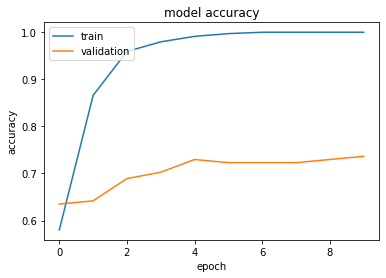

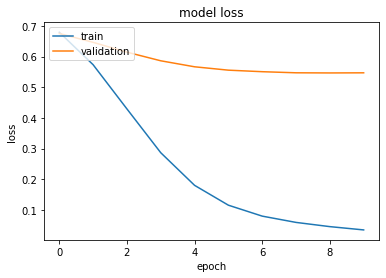

In [144]:
plot_accuracy_loss()